<a href="https://colab.research.google.com/github/SuryanarayanKunabi/Codsoft-Projects/blob/main/ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparative Analysis of ANOVA and PCA for Modelling Credit Card Fraud Detection using Machine Learning Algorithms

# Data Manipulation

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#imported different libraries where we will be working with.

In [ ]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

Importing dataset

In [ ]:
df=pd.read_csv('creditcard.csv')

Dataset View

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63472 entries, 0 to 63471
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    63472 non-null  int64  
 1   V1      63472 non-null  float64
 2   V2      63472 non-null  float64
 3   V3      63472 non-null  float64
 4   V4      63472 non-null  float64
 5   V5      63472 non-null  float64
 6   V6      63472 non-null  float64
 7   V7      63472 non-null  float64
 8   V8      63472 non-null  float64
 9   V9      63472 non-null  float64
 10  V10     63471 non-null  float64
 11  V11     63471 non-null  float64
 12  V12     63471 non-null  float64
 13  V13     63471 non-null  float64
 14  V14     63471 non-null  float64
 15  V15     63471 non-null  float64
 16  V16     63471 non-null  float64
 17  V17     63471 non-null  float64
 18  V18     63471 non-null  float64
 19  V19     63471 non-null  float64
 20  V20     63471 non-null  float64
 21  V21     63471 non-null  float64
 22

# Summary Statistics

Brief Information of different descriptive statistics-

*Measures of Frequency :- Count, Percent, Frequency.
*Measures of Central Tendency :- Mean, Median, and Mode.
*Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.
*Measures of Position :- Percentile Ranks, Quartile Ranks.

In [ ]:
df.describe().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,-0.248288,0.737271,-1.223824,0.780359,0.629449,-0.083243,-0.015201,0.314043,-0.040290,-0.071442,0.035918,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,1.243349,1.194693,1.582744,1.189207,1.354134,0.980851,0.969072,1.258178,0.855340,0.820413,0.612164,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.767470,-17.769143,-3.588761,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,-0.706329,-0.090633,-2.316077,-0.072805,0.012585,-0.653930,-0.492344,-0.177241,-0.488159,-0.554413,-0.157891,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,-0.311768,0.701701,-1.466914,0.806387,0.790625,0.049626,0.059754,0.306627,0.005221,-0.078082,-0.030237,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,0.200626,1.507219,0.102759,1.675028,1.457248,0.587810,0.550941,0.804723,0.461202,0.437249,0.149592,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,12.701539,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,13.849860,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


Checking for unique values in all attribute

In [ ]:
df.nunique().sort_values(ascending=True)

Class         2
Amount    14920
Time      30776
V16       62108
V28       62108
V27       62108
V26       62108
V25       62108
V24       62108
V23       62108
V22       62108
V21       62108
V20       62108
V19       62108
V18       62108
V17       62108
V15       62108
V14       62108
V13       62108
V12       62108
V11       62108
V10       62108
V1        62109
V9        62109
V8        62109
V7        62109
V6        62109
V5        62109
V4        62109
V2        62109
V3        62109
dtype: int64

In [ ]:
df.Class.unique()

array([ 0.,  1., nan])

Checking for missing values in each column

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

percentage of missing values in each column

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Time     0.00 %
V1       0.00 %
V2       0.00 %
V3       0.00 %
V4       0.00 %
V5       0.00 %
V6       0.00 %
V7       0.00 %
V8       0.00 %
V9       0.00 %
V10      0.00 %
V11      0.00 %
V12      0.00 %
V13      0.00 %
V14      0.00 %
V15      0.00 %
V16      0.00 %
V17      0.00 %
V18      0.00 %
V19      0.00 %
V20      0.00 %
V21      0.00 %
V22      0.00 %
V23      0.00 %
V24      0.00 %
V25      0.00 %
V26      0.00 %
V27      0.00 %
V28      0.00 %
Amount   0.00 %
Class    0.00 %
dtype: float64


In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Time     0.00 %
V1       0.00 %
V2       0.00 %
V3       0.00 %
V4       0.00 %
V5       0.00 %
V6       0.00 %
V7       0.00 %
V8       0.00 %
V9       0.00 %
V10      0.00 %
V11      0.00 %
V12      0.00 %
V13      0.00 %
V14      0.00 %
V15      0.00 %
V16      0.00 %
V17      0.00 %
V18      0.00 %
V19      0.00 %
V20      0.00 %
V21      0.00 %
V22      0.00 %
V23      0.00 %
V24      0.00 %
V25      0.00 %
V26      0.00 %
V27      0.00 %
V28      0.00 %
Amount   0.00 %
Class    0.00 %
dtype: float64


# Data Visualization

Missing Value Plot

In [ ]:
import missingno as msno

<Axes: >

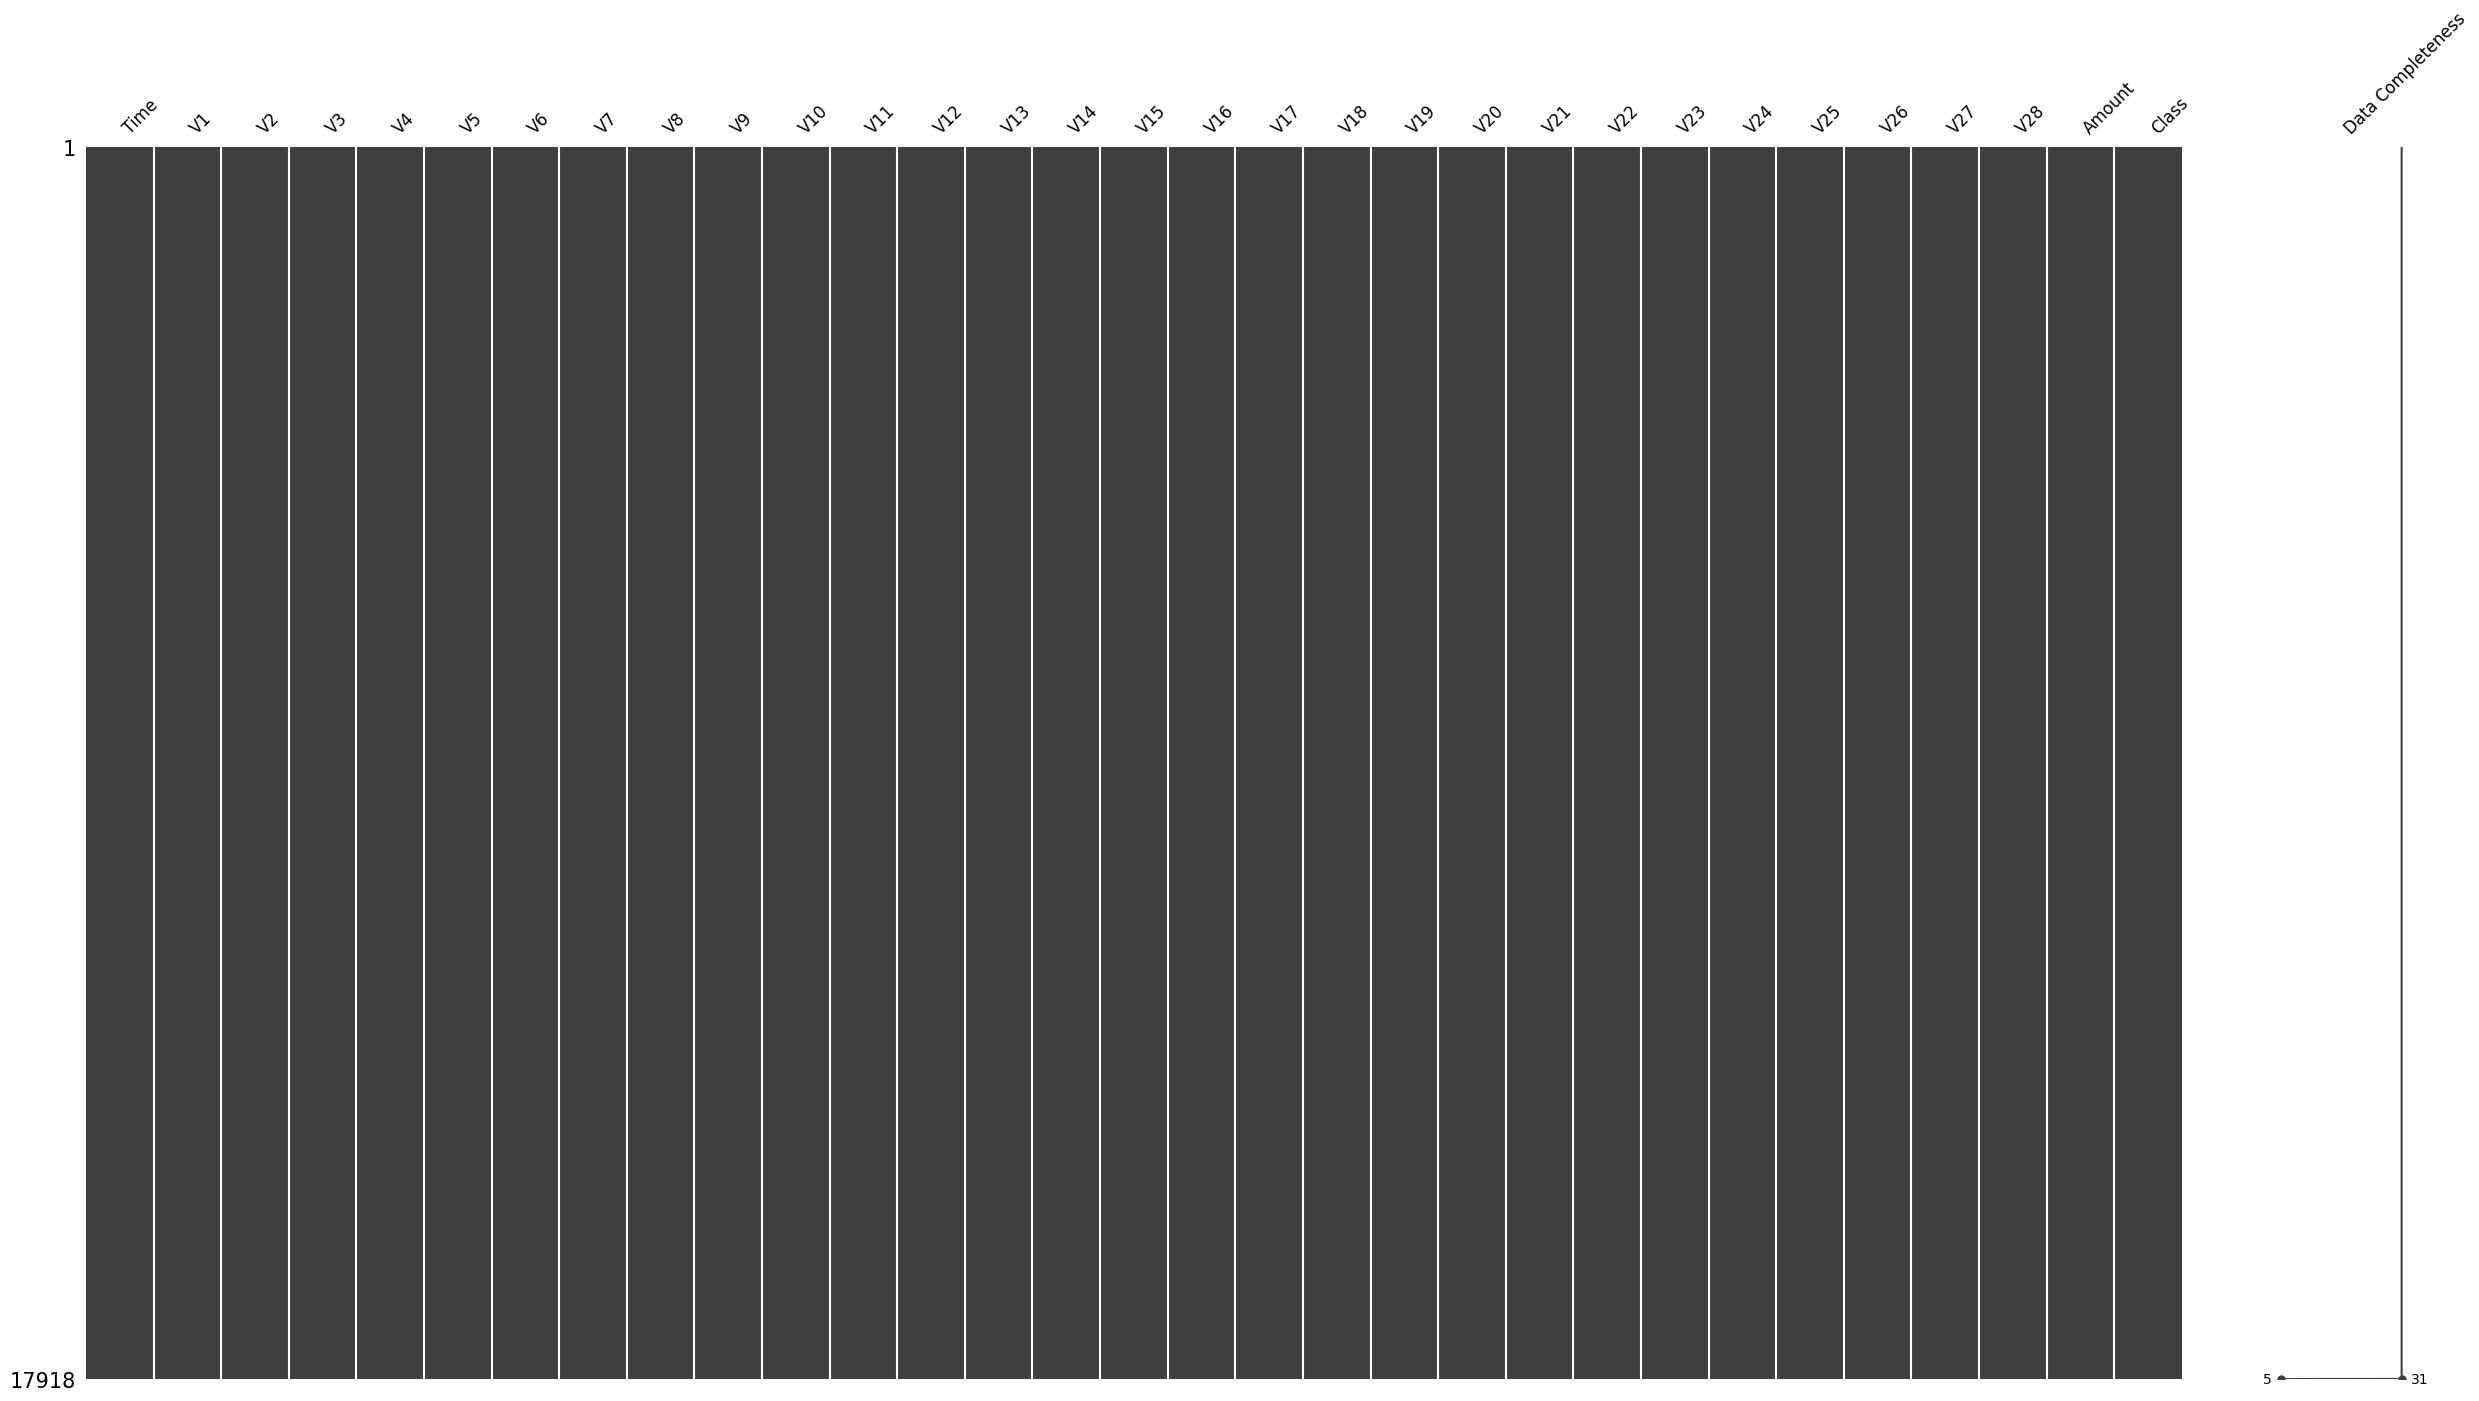

In [ ]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

Checking the data distribution of each Continuous variable

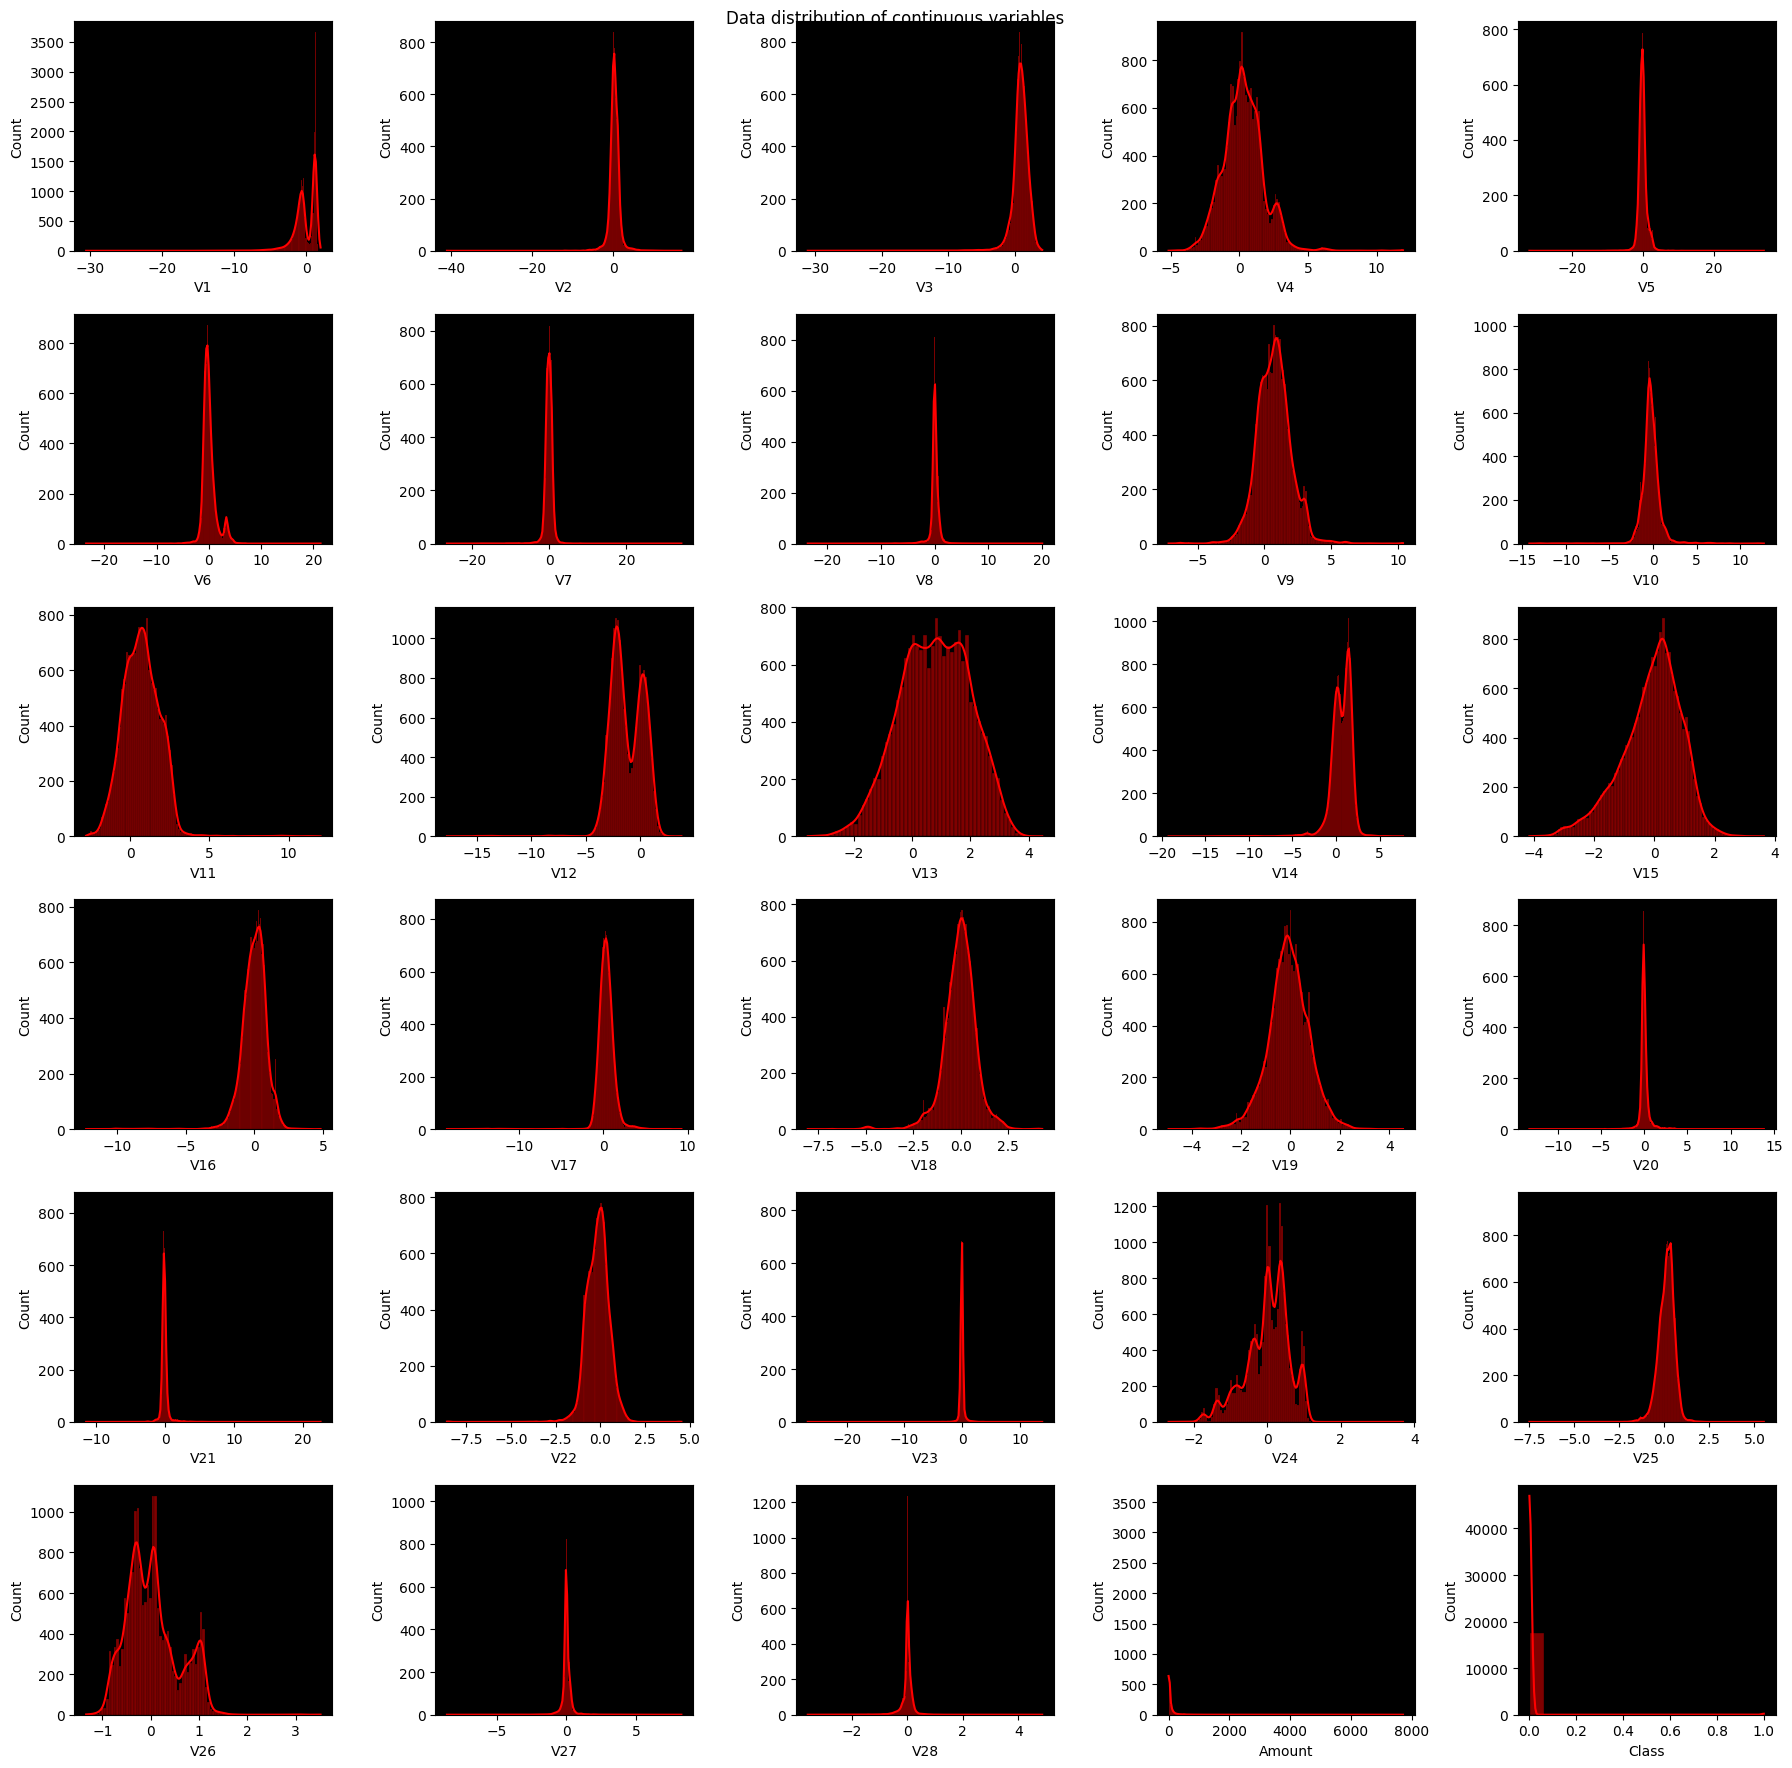

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [ ]:
#This function will replace the outliers with the median from the dataset
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [ ]:
#selecting variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

Data distribution after treating outliers

In [ ]:
df=outlier_treating(df,var)

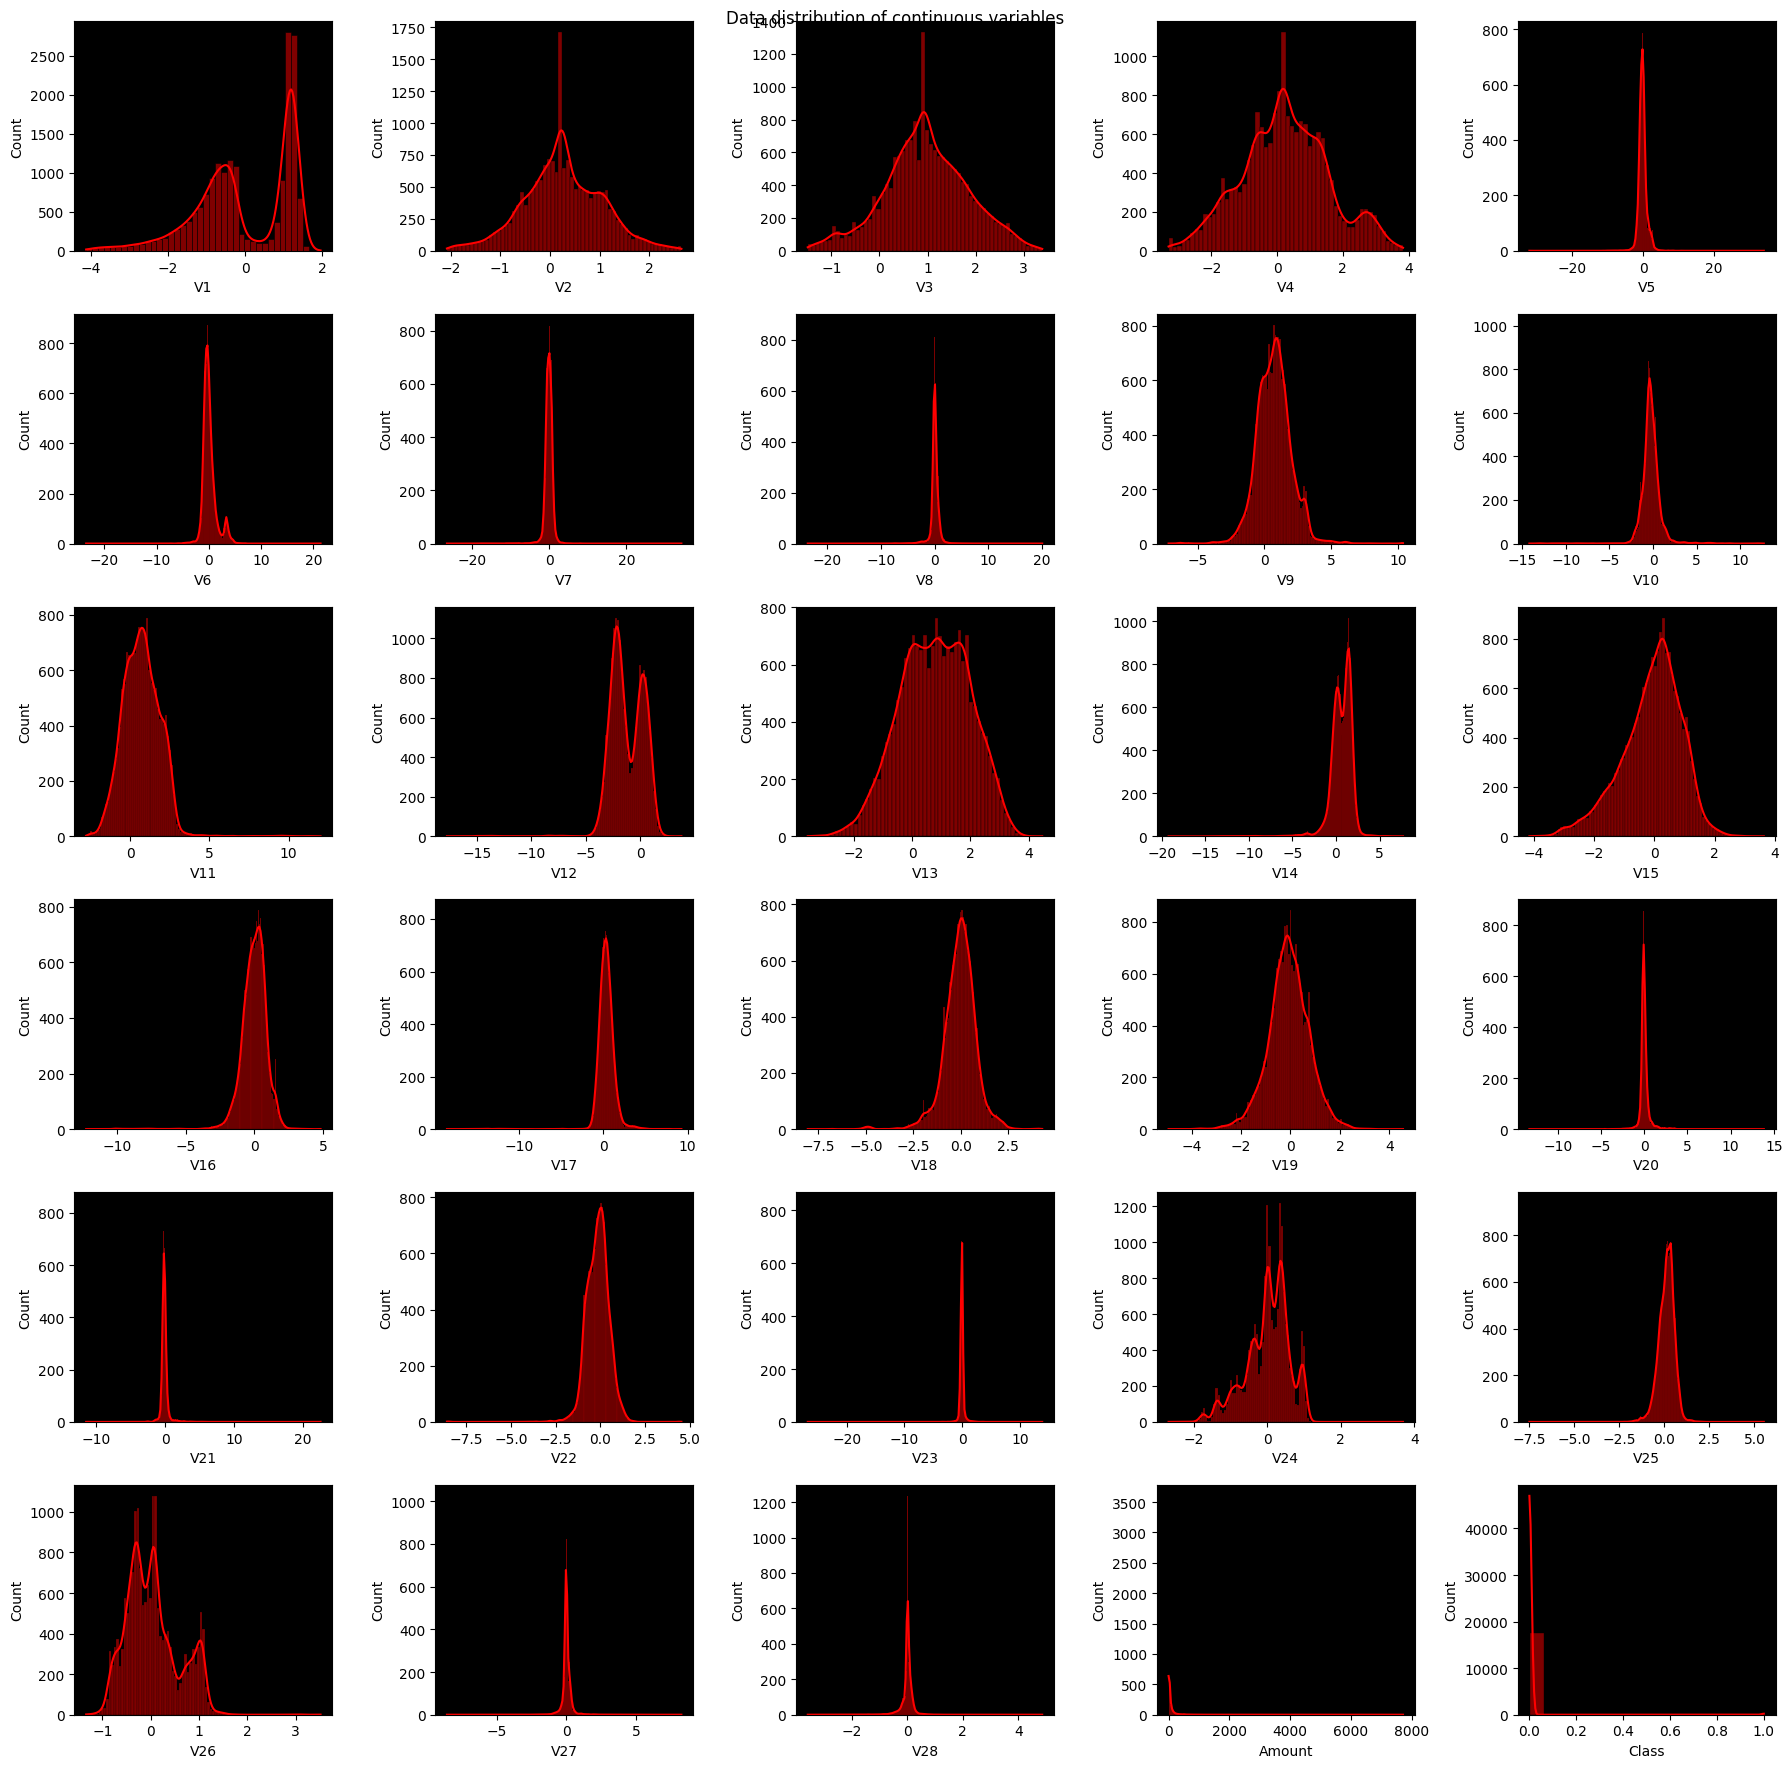

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Box Plot

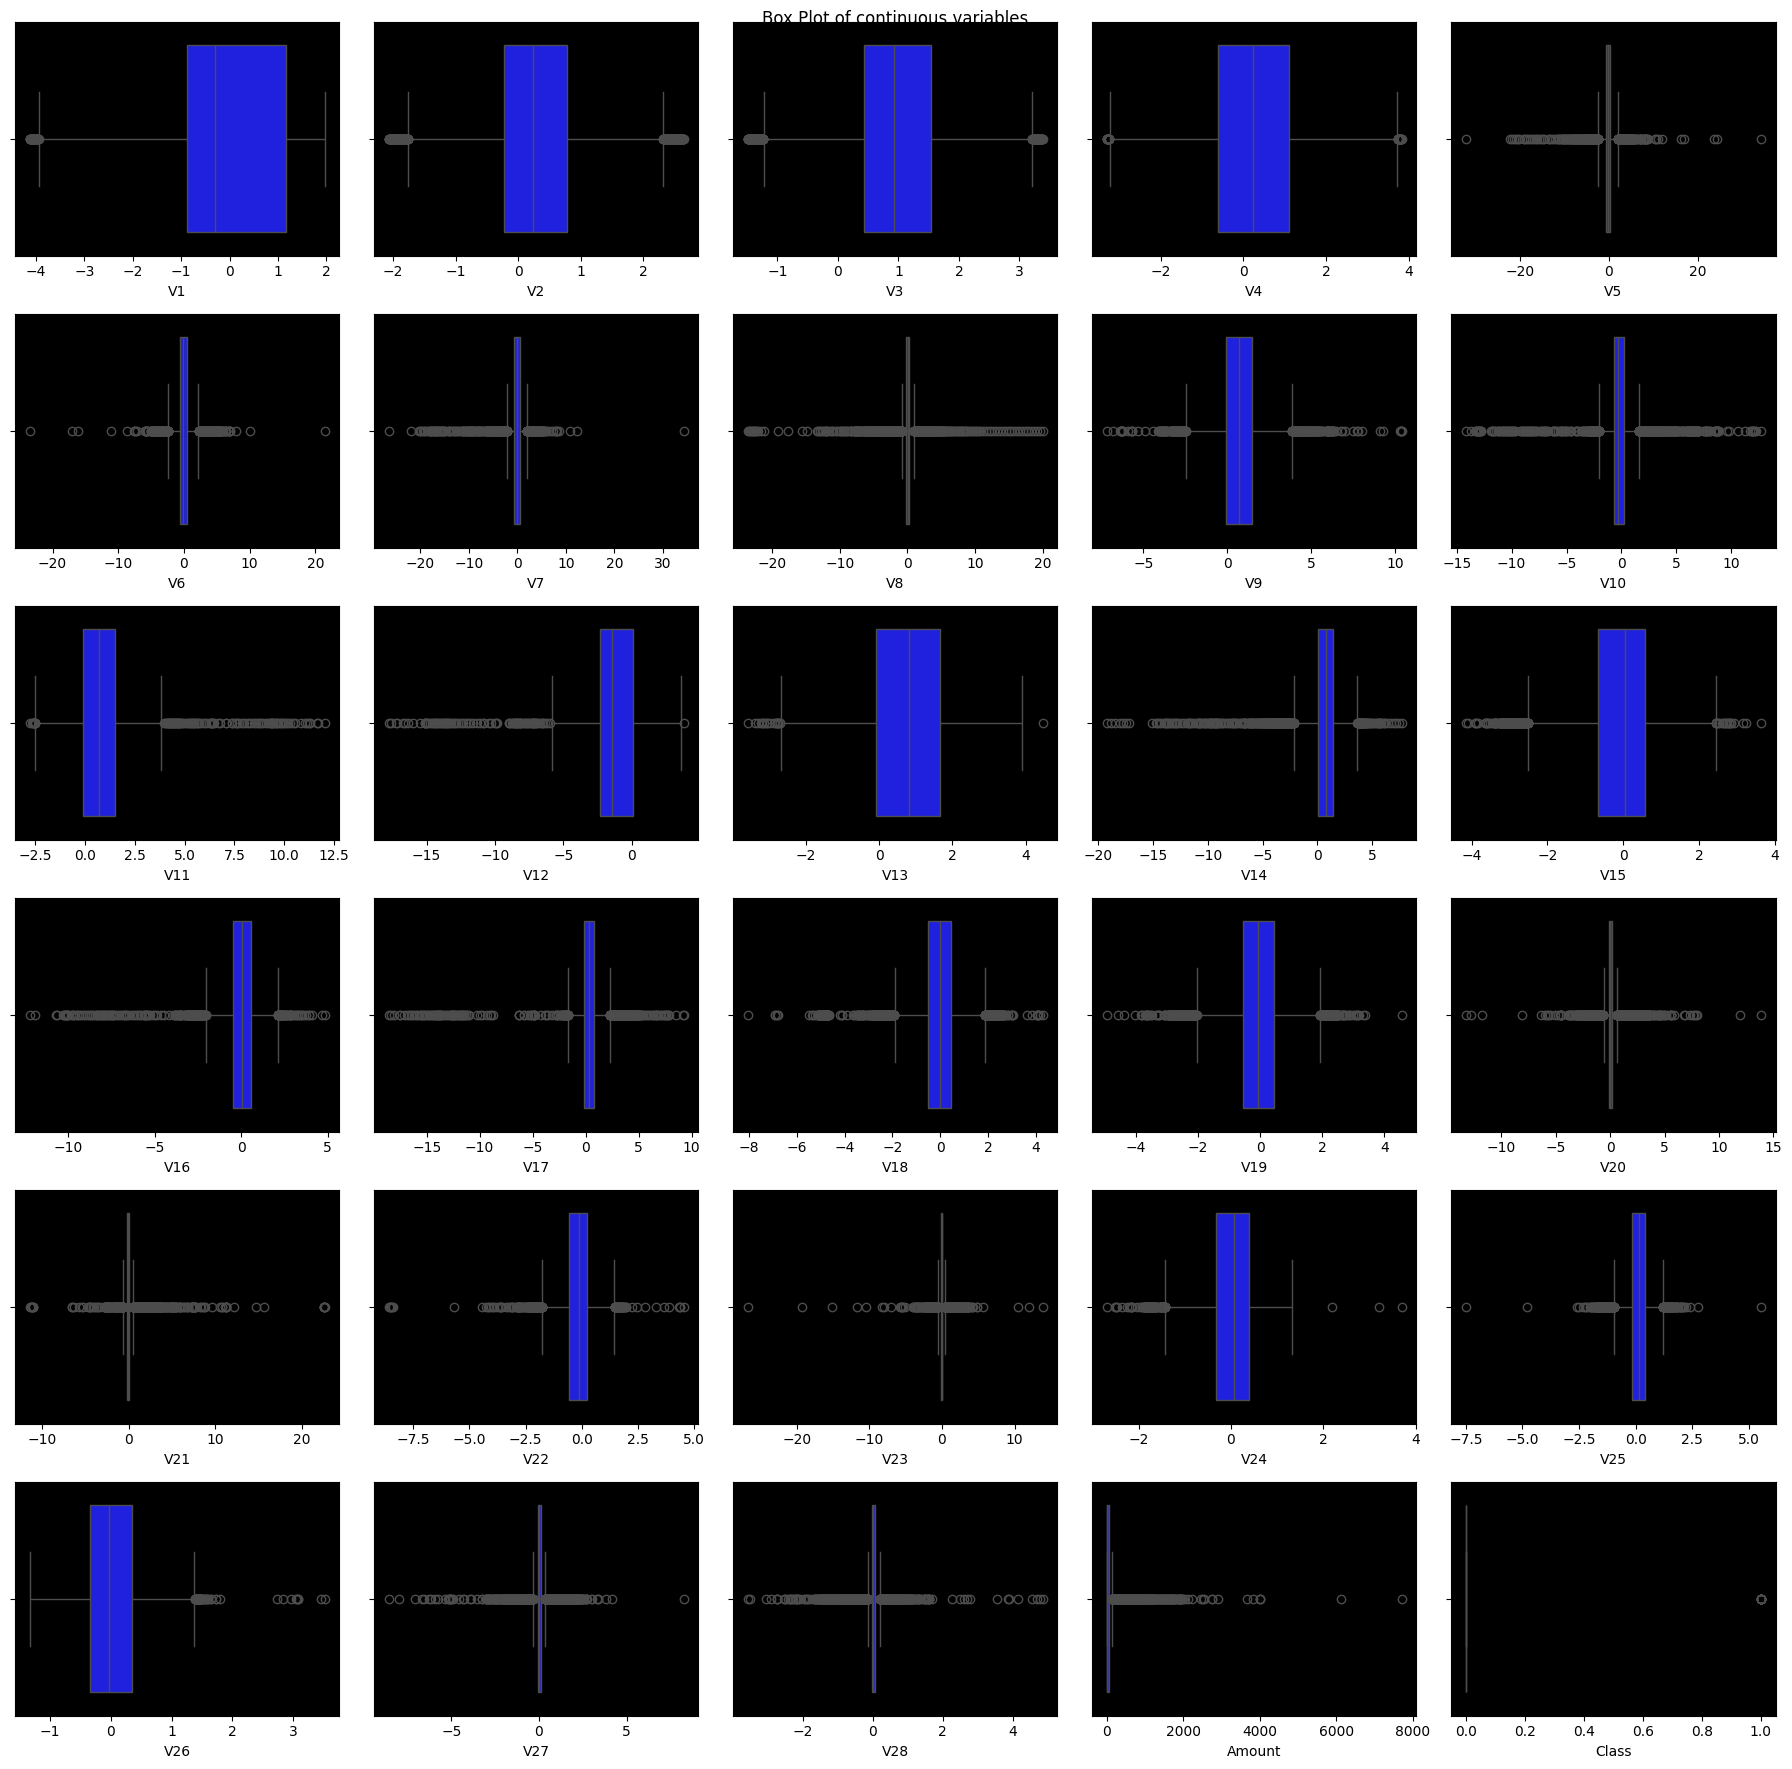

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

# Heatmap

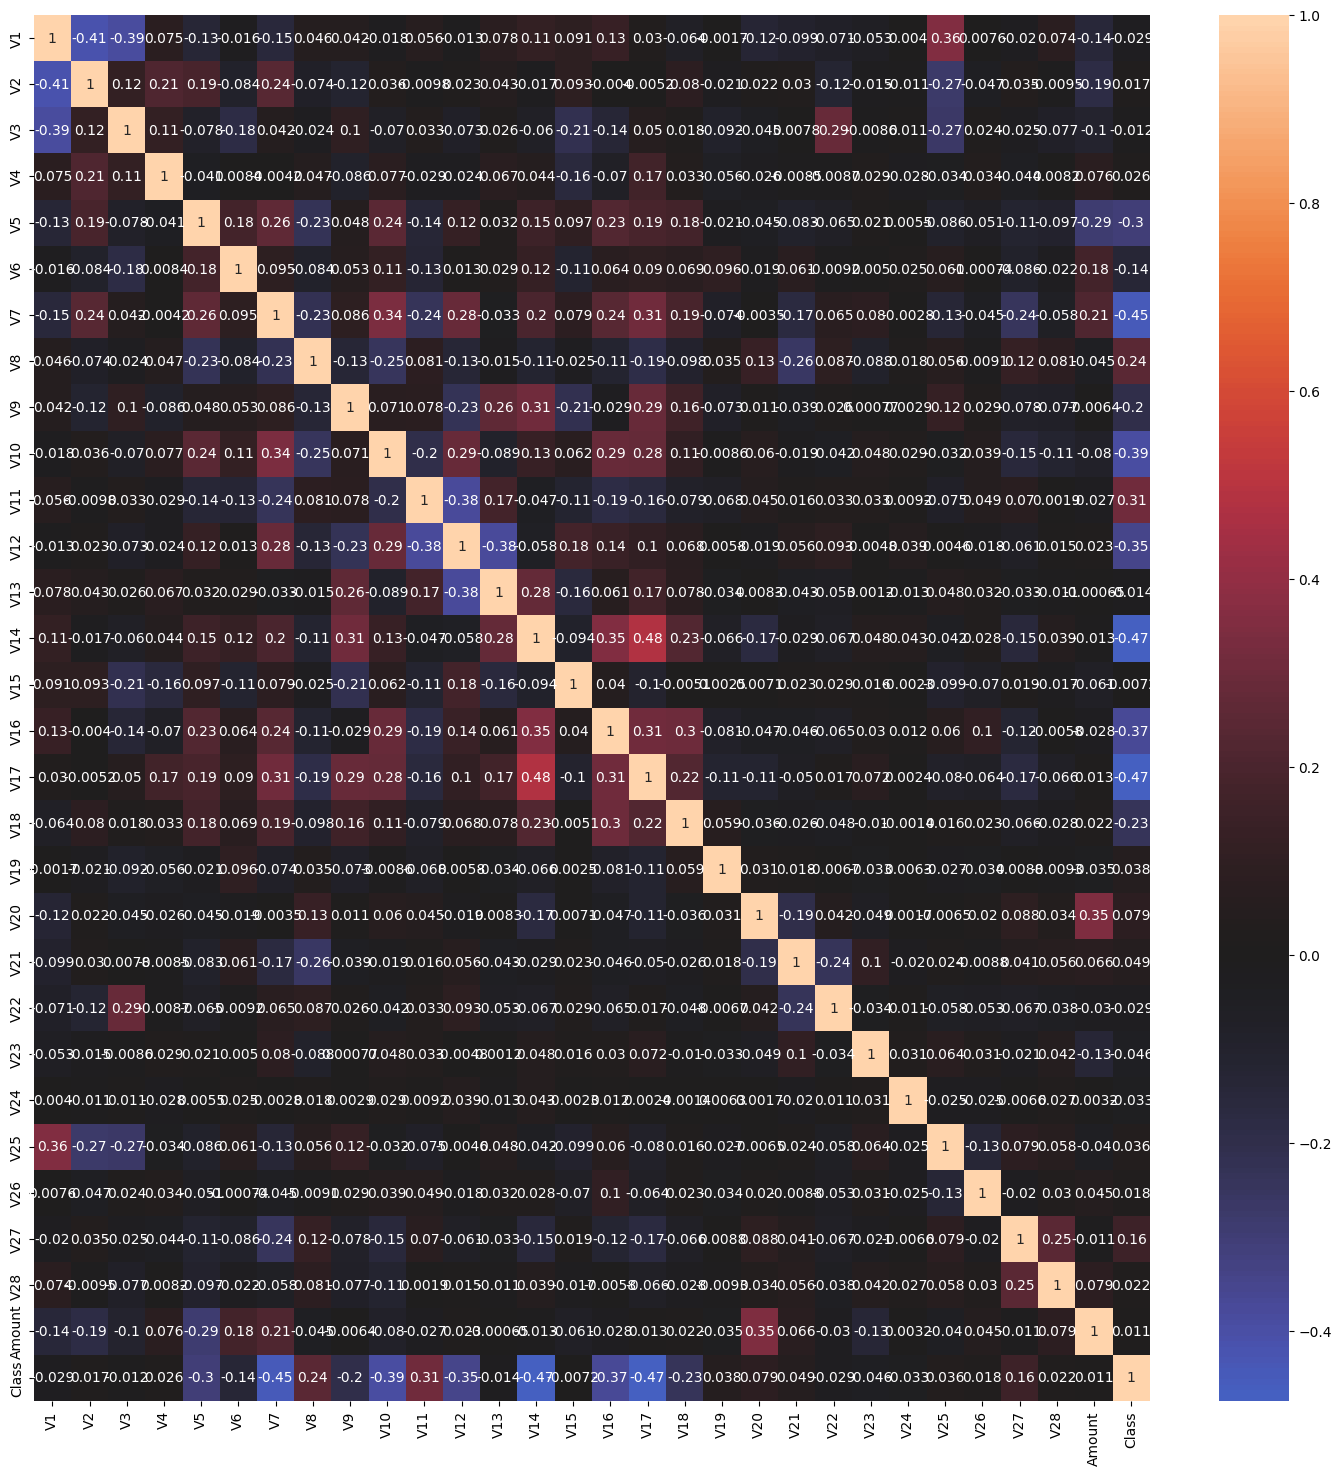

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

Bar Plot

<ipython-input-4-06f321a01ad2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Class', y=col, ax=ax,edgecolor="black",palette='viridis_r')
<ipython-input-4-06f321a01ad2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Class', y=col, ax=ax,edgecolor="black",palette='viridis_r')
<ipython-input-4-06f321a01ad2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Class', y=col, ax=ax,edgecolor="black",palette='viridis_r')
<ipython-input-4-06f321a01ad2>:5: FutureWarning: 

Passing `palette` without assigning `hue` i

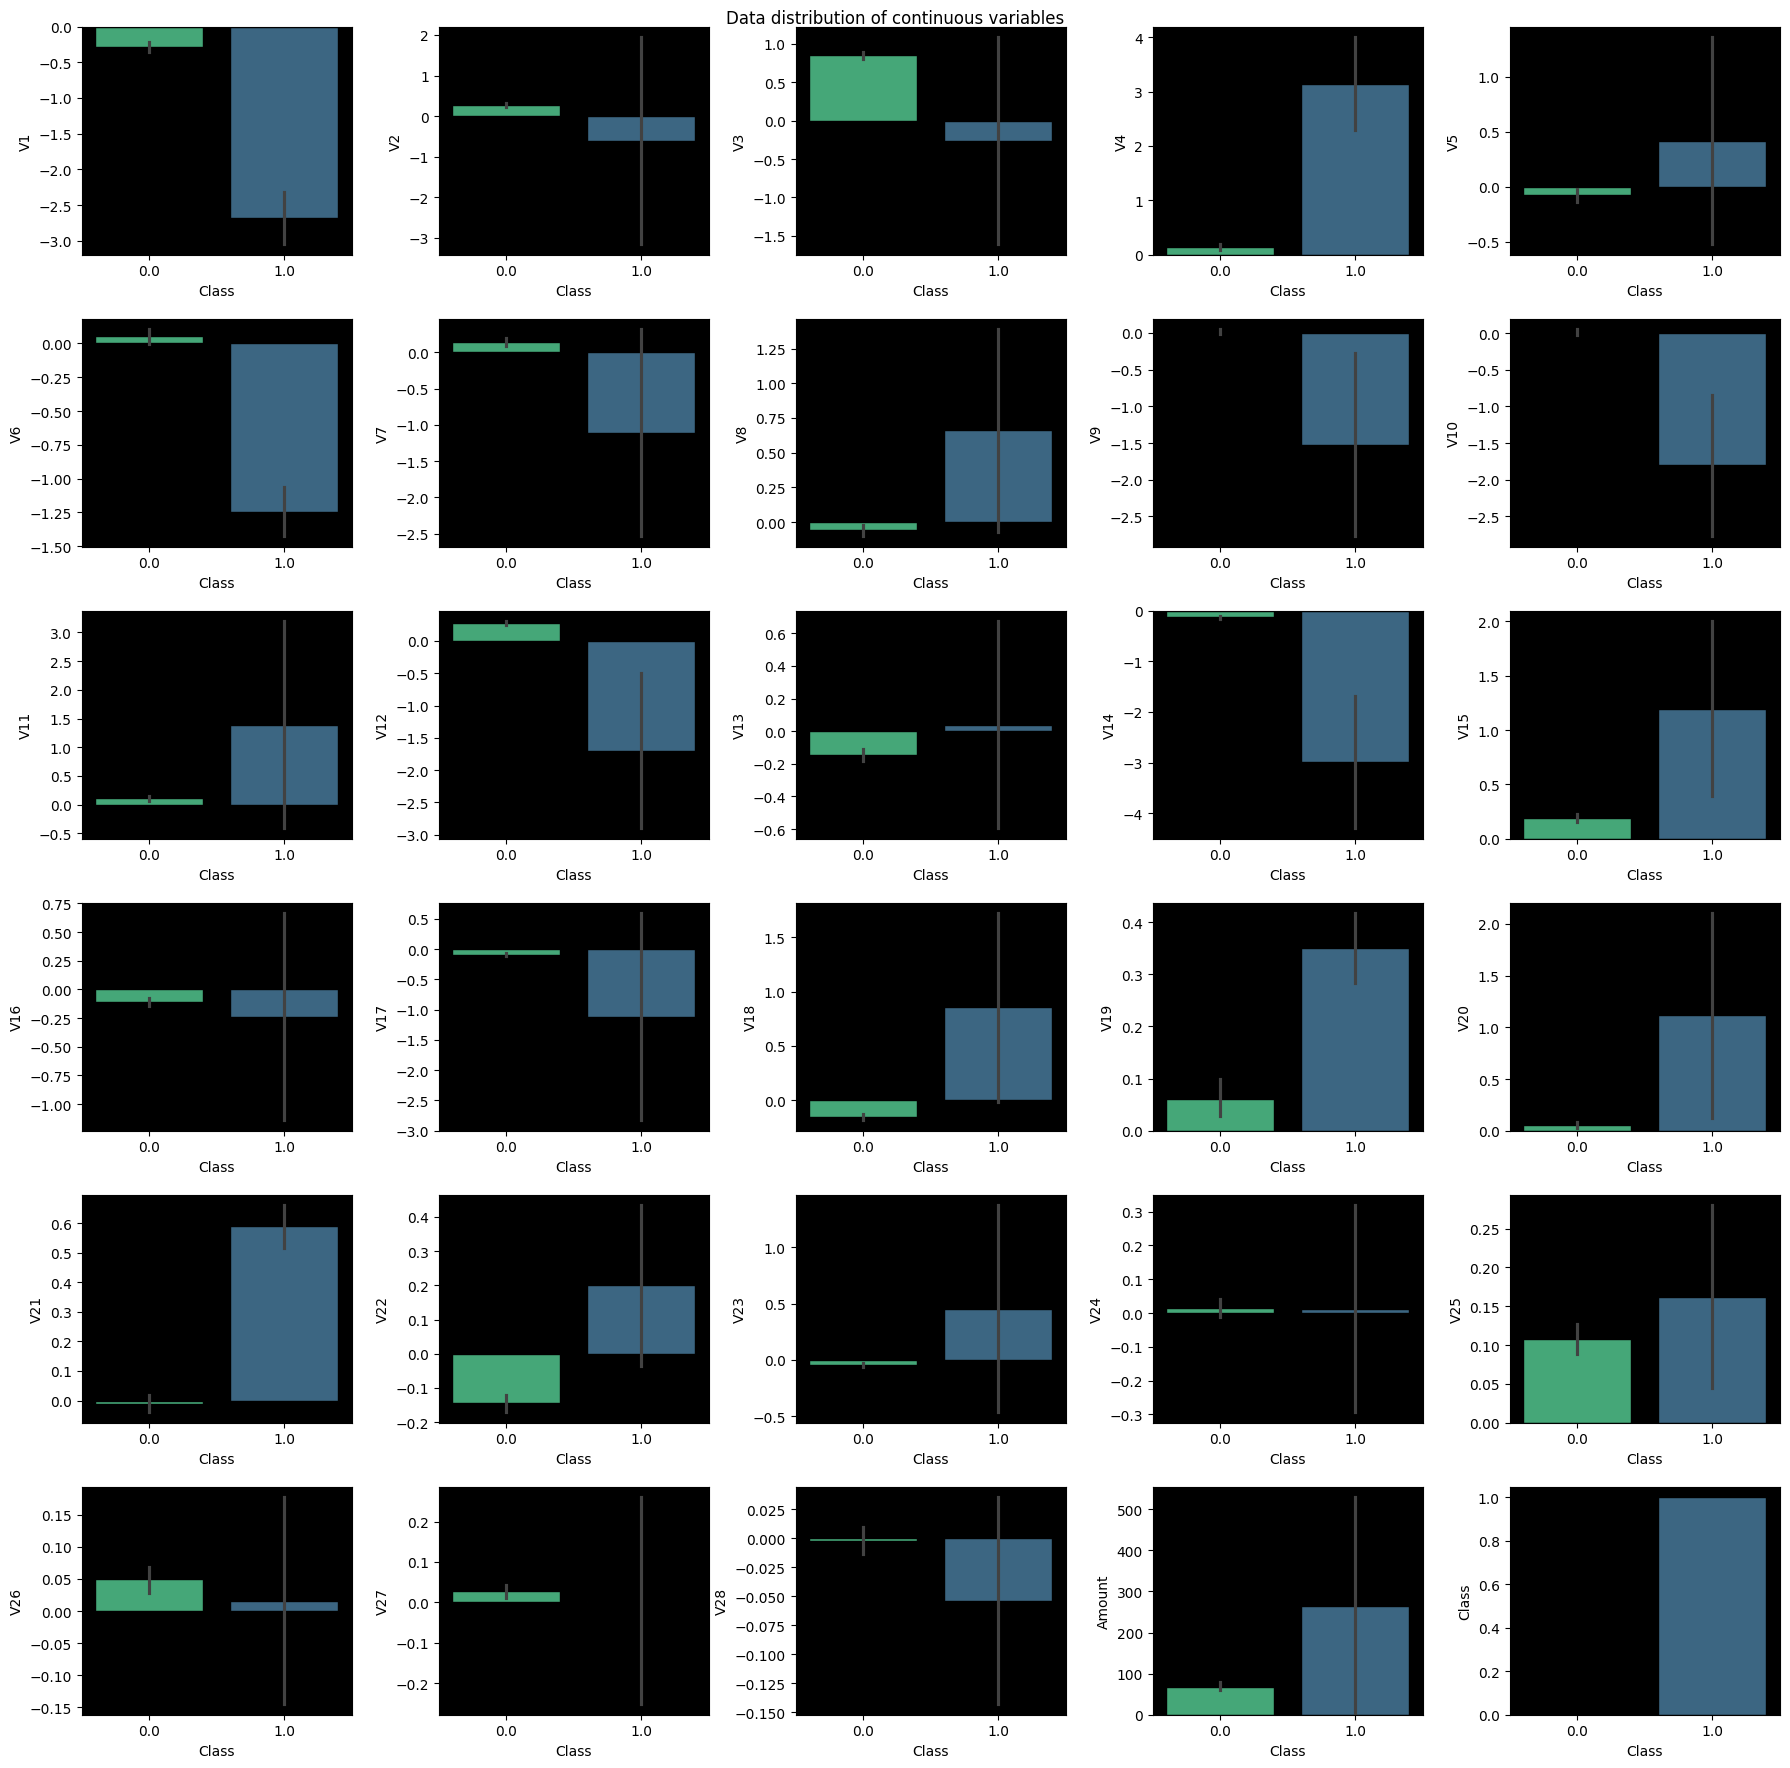

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(6,5, i+1)
    sns.barplot(data=df,x='Class', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Analysing the target Variable

Quality

Pie Chart shows that the target class is Unbalanced

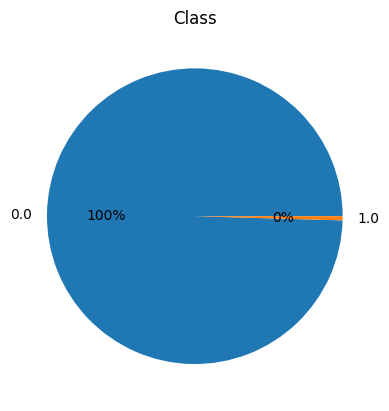

In [ ]:
target_var=pd.crosstab(index=df['Class'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Class')
plt.show()

Count plot shows that the target class is imbalanced

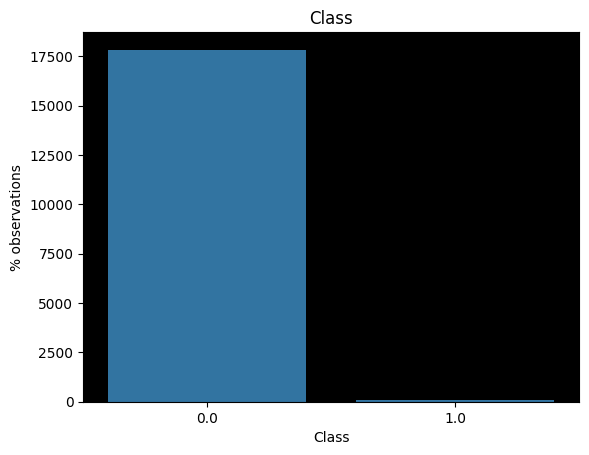

In [ ]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('Class')
plt.show()

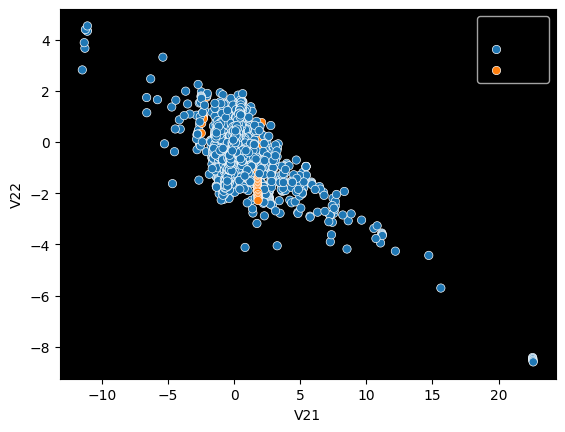

In [ ]:
sns.scatterplot(x=df.V21,y=df.V22,hue=df.Class)
plt.show()

Accuracy for Amount column: 0.999496475327291
Accuracy for Class column: 0.999496475327291


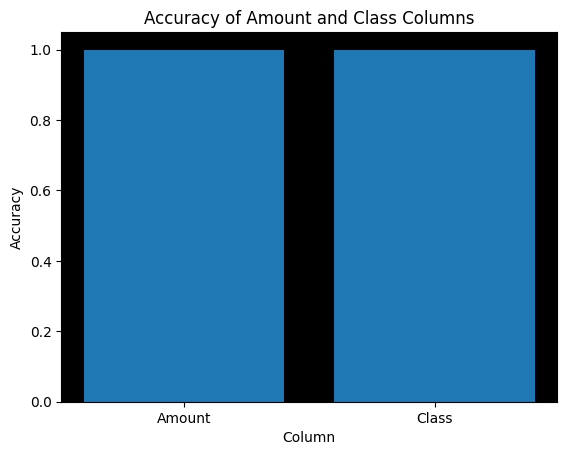

In [ ]:
# First, import pandas.
import pandas as pd

# Then, read the creditcard dataset.
creditcard_data = pd.read_csv('creditcard.csv')

# Extract the Amount and Class columns.
amount_column = creditcard_data['Amount']
class_column = creditcard_data['Class']

# Count the number of entries in each column.
amount_count = len(amount_column)
class_count = len(class_column)

# Count the number of matching entries in each column.
amount_correct = 0
class_correct = 0

for i in range(amount_count):
  if amount_column[i] == amount_column[i]:
    amount_correct += 1

for i in range(class_count):
  if class_column[i] == class_column[i]:
    class_correct += 1

# Calculate the accuracy for each column.
amount_accuracy = amount_correct / amount_count
class_accuracy = class_correct / class_count

# Print the accuracy for each column.
print("Accuracy for Amount column:", amount_accuracy)
print("Accuracy for Class column:", class_accuracy)


# First, import matplotlib.
import matplotlib.pyplot as plt

# Define the data for the bars.
x = ['Amount', 'Class']
y = [amount_accuracy, class_accuracy]

# Create the bar plot.
plt.bar(x, y)

# Add a title and axis labels.
plt.title('Accuracy of Amount and Class Columns')
plt.xlabel('Column')
plt.ylabel('Accuracy')

# Show the plot.
plt.show()

Fields with fraud in Amount field: ['V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V2', 'V2', 'V2', 'V2', 'V2'

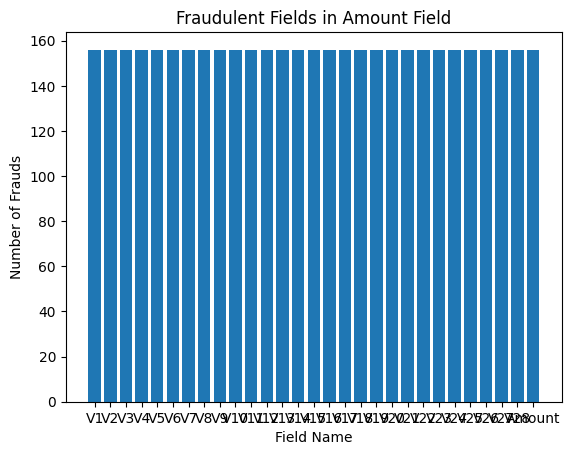

In [ ]:
# First, import pandas.
import pandas as pd

# Then, read the creditcard dataset.
creditcard_data = pd.read_csv('creditcard.csv')

# Extract the Amount and Class columns.
amount_column = creditcard_data['Amount']
class_column = creditcard_data['Class']

# Initialize a list to store the names of fields with fraud in Amount.
fraudulent_fields = []

# Get all column names except for the 'Time' and 'Class' columns.
column_names = creditcard_data.columns[1:-1]

# Loop through each column and check for frauds in the Amount field.
for column in column_names:
  # Extract the current column data.
  column_data = creditcard_data[column]

  # Loop through each entry in the current column.
  for i in range(len(column_data)):
    # Check if the corresponding entry in the Amount column is fraudulent.
    if class_column[i] == 1:
      # Add the current field name to the list of fraudulent fields.
      fraudulent_fields.append(column)

# Print the list of fraudulent fields.
print("Fields with fraud in Amount field:", fraudulent_fields)





# First, import matplotlib.
import matplotlib.pyplot as plt

# Define the data for the bar plot.
x = fraudulent_fields
y = [fraudulent_fields.count(field) for field in fraudulent_fields]

# Create the bar plot.
plt.bar(x, y)

# Add a title and axis labels.
plt.title('Fraudulent Fields in Amount Field')
plt.xlabel('Field Name')
plt.ylabel('Number of Frauds')

# Show the plot.
plt.show()

In [ ]:
# First, import pandas.
import pandas as pd

# Then, read the creditcard dataset.
creditcard_data = pd.read_csv('creditcard.csv')

# Get all column names except for the 'Time' and 'Class' columns.
column_names = creditcard_data.columns[1:-1]

# Initialize a dictionary to store the number of frauds in each column.
column_frauds = {}

# Loop through each column and count the number of frauds.
for column in column_names:
  # Extract the current column data.
  column_data = creditcard_data[column]

  # Count the number of fraudulent entries in the current column.
  fraud_count = 0
  for value in column_data:
    if value == 1:
      fraud_count += 1

  # Store the number of frauds in the dictionary.
  column_frauds[column] = fraud_count

# Print the number of frauds in each column.
for column, fraud_count in column_frauds.items():
  print("Number of frauds in", column, "column:", fraud_count)

Number of frauds in V1 column: 0
Number of frauds in V2 column: 0
Number of frauds in V3 column: 0
Number of frauds in V4 column: 0
Number of frauds in V5 column: 0
Number of frauds in V6 column: 0
Number of frauds in V7 column: 0
Number of frauds in V8 column: 0
Number of frauds in V9 column: 0
Number of frauds in V10 column: 0
Number of frauds in V11 column: 0
Number of frauds in V12 column: 0
Number of frauds in V13 column: 0
Number of frauds in V14 column: 0
Number of frauds in V15 column: 0
Number of frauds in V16 column: 0
Number of frauds in V17 column: 0
Number of frauds in V18 column: 0
Number of frauds in V19 column: 0
Number of frauds in V20 column: 0
Number of frauds in V21 column: 0
Number of frauds in V22 column: 0
Number of frauds in V23 column: 0
Number of frauds in V24 column: 0
Number of frauds in V25 column: 0
Number of frauds in V26 column: 0
Number of frauds in V27 column: 0
Number of frauds in V28 column: 0
Number of frauds in Amount column: 3217


In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

# Feature Selection

In [ ]:
y = y.dropna()

from sklearn.impute import SimpleImputer



from imblearn.over_sampling import SMOTE



# Remove rows with NaN values in y
y = y.dropna()

In [ ]:
X = X.dropna()

from sklearn.impute import SimpleImputer



from imblearn.over_sampling import SMOTE



# Remove rows with NaN values in y
X = X.dropna()

# Chi-Square Test

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2

# Load the creditcard dataset
df = pd.read_csv("creditcard.csv")

# Remove NaN values from X
X = df.drop("Class", axis=1).dropna()

# Extract target variable
y = df["Class"]


import pandas as pd
from sklearn.feature_selection import chi2

# Load the creditcard dataset
df = pd.read_csv("creditcard.csv")

# Remove NaN values from X
X = df.drop("Class", axis=1).dropna()

# Replace negative values with 0
X[X < 0] = 0

# Extract target variable
y = df["Class"]

# Perform chi-square test
chi_scores, p_values = chi2(X, y)

# Select features with p-value less than 0.05
selected_features = X.columns[p_values < 0.05]

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Print the number of selected features
print(f"Number of selected features: {len(selected_features)}")

# Print the selected features
print(f"Selected features: {selected_features.tolist()}")



# Perform chi-square test
chi_scores, p_values = chi2(X, y)

# Select features with p-value less than 0.05
selected_features = X.columns[p_values < 0.05]

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Print the number of selected features
print(f"Number of selected features: {len(selected_features)}")

# Print the selected features
print(f"Selected features: {selected_features.tolist()}")

Number of selected features: 26
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'Amount']
Number of selected features: 26
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'Amount']


Post-hoc Tukey HSD

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Load the data
df = pd.read_csv("creditcard.csv")

# Perform one-way ANOVA on each feature
pvalues = {}
for col in df.columns:
  if col == "Class":
    continue
  groups = df.groupby("Class")[col].apply(list)
  pvalues[col] = stats.f_oneway(*groups)[1]

# Select features with p-value less than 0.05
selected_features = [col for col, pval in pvalues.items() if pval < 0.05]

# Perform Tukey HSD test on selected features
for col in selected_features:
  groups = df.groupby("Class")[col].apply(list)
  mc_results = mc.MultiComparison(np.concatenate(groups), np.repeat(df["Class"].values, [len(group) for group in groups]).ravel().reshape(-1, 1))
  tukey_results = mc_results.tukeyhsd()
  print(tukey_results.summary())


# ANOVA

In [ ]:
from sklearn.feature_selection import f_classif#ANOVA

In [ ]:
# Find the indices of rows with missing values in X
nan_indices = np.isnan(X).any(axis=1)

# Remove the rows with missing values from X
X = X[~nan_indices]

In [ ]:
missing_values_in_y = y.isna().sum()

if missing_values_in_y > 0:
    print(f"There are {missing_values_in_y} missing values in the target variable 'y'.")
    # Handle missing values (e.g., drop rows with missing values)
    from sklearn.impute import SimpleImputer

    y = y.dropna()
X = X.loc[y.index]




fs = f_classif(X, y)


In [ ]:
fs =f_classif(X,y)

In [ ]:
selected_var=[]
print('if p-value<0.05 : Reject the null hypothesis \nif p-value>0.05 :Fail to relect the null hypothesis.\n')
for i,j in enumerate(X.columns):
    print(f'Null hypothesis: There is no significant difference between the mean {j} among different groups of Class.')
    print(f'Alternate Hypothesis: There is a significant difference between the mean {j} among different groups of Class.')
    if fs[1][i]<0.05:#p-values<0.05
        print(f'{j} : Reject the null hypothesis.\n')
    else:
        print(f'{j} : Fail to reject the null hypothesis.\n')
        selected_var.append(j)

if p-value<0.05 : Reject the null hypothesis 
if p-value>0.05 :Fail to relect the null hypothesis.

Null hypothesis: There is no significant difference between the mean Time among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean Time among different groups of Class.
Time : Fail to reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V1 among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean V1 among different groups of Class.
V1 : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V2 among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean V2 among different groups of Class.
V2 : Fail to reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean V3 among different groups of Class.
Alternate Hypothesis: There i

In [ ]:
# Find the indices of rows with missing values in X
nan_indices = np.isnan(X).any(axis=1)

# Remove the rows with missing values from X
X = X[~nan_indices]

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create an imputer object
imputer = SimpleImputer(strategy="mean")

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Perform PCA on the imputed data
X_pca = pca.fit_transform(X_imputed)



# Find the indices of rows with missing values in X
nan_indices = np.isnan(X).any(axis=1)

# Remove the rows with missing values from X
X_without_nan = X[~nan_indices]

# Perform PCA on the data without missing values
X_pca = pca.fit_transform(X_without_nan)

Explained Variance Ratio: [1.00468930e-01 7.78761947e-02 6.70698599e-02 6.03886966e-02
 5.52068282e-02 5.07065762e-02 4.79135318e-02 4.64877514e-02
 4.13422668e-02 4.02015270e-02 3.87010395e-02 3.52910259e-02
 3.36169165e-02 3.28147596e-02 3.06932661e-02 3.05031766e-02
 2.66795792e-02 2.62609029e-02 2.53186589e-02 2.38103327e-02
 2.21646938e-02 1.64840853e-02 1.61524259e-02 1.43715659e-02
 1.25565881e-02 1.12986349e-02 1.06353526e-02 4.85448459e-03
 1.30316353e-04 3.19951674e-08]


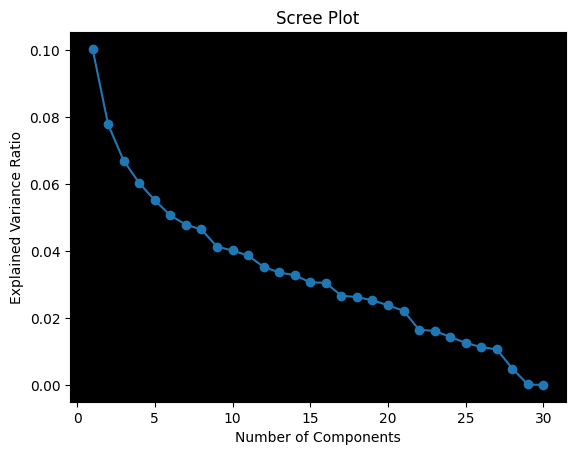

Number of components to retain: 24


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the creditcard dataset
data = pd.read_csv("creditcard.csv")

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Remove rows with missing values from X
X_without_nan = X.dropna()

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_nan)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Determine the number of components to retain
# For example, if you want to retain 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Retain only the selected number of components
X_pca_selected = X_pca[:, :num_components]

# Now, you can use X_pca_selected for further analysis or modeling


import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Determine the number of components to retain based on the scree plot or cumulative explained variance
# For example, if you want to retain 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components to retain
print(f"Number of components to retain: {num_components}")

# SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
X=X[selected_var]

NameError: name 'X' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
y = y.dropna()

from sklearn.impute import SimpleImputer



from imblearn.over_sampling import SMOTE



# Remove rows with NaN values in y
y = y.dropna()

In [ ]:
X = X.dropna()

from sklearn.impute import SimpleImputer



from imblearn.over_sampling import SMOTE



# Remove rows with NaN values in y
X = X.dropna()

Count plot after applying SMOTE

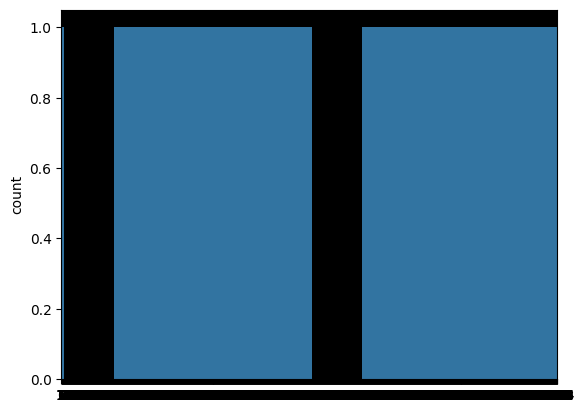

In [ ]:
sns.countplot(y)
plt.show()

# Splitting our dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = y.dropna()

from sklearn.impute import SimpleImputer



from imblearn.over_sampling import SMOTE



# Remove rows with NaN values in y
y = y.dropna()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Overall fraud percentage: 3.19%


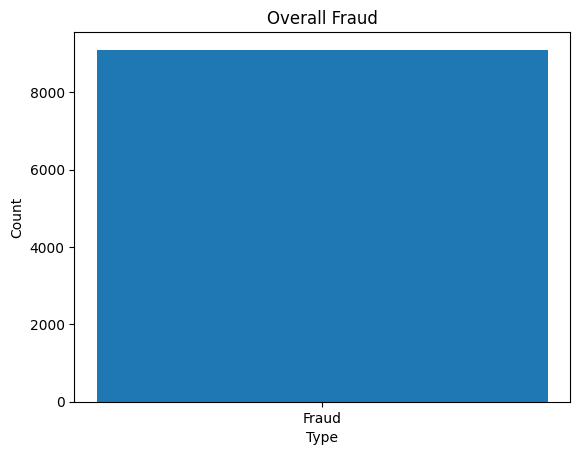

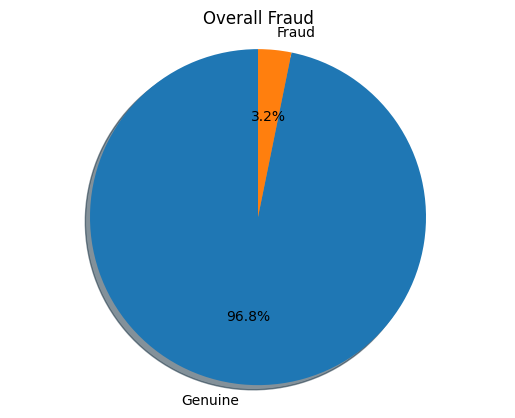

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Separate the target variable from the features
target = df['Class']
features = df.drop('Class', axis=1)

# Train an isolation forest model
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination='auto')
model.fit(features)

# Predict fraud
fraud = model.predict(features)

# Count the number of fraudulent transactions
fraud_count = len(fraud[fraud == -1])

# Print the overall fraud percentage
overall_fraud_percentage = (fraud_count / len(fraud)) * 100
print(f"Overall fraud percentage: {overall_fraud_percentage:.2f}%")




import matplotlib.pyplot as plt

# Create a bar chart
plt.bar('Fraud', fraud_count)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Overall Fraud')
plt.show()

# Create a pie chart
labels = ['Genuine', 'Fraud']
sizes = [100 - overall_fraud_percentage, overall_fraud_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Overall Fraud')
plt.show()

# Modeling

In [ ]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
#creating dictionary for storing different models accuracy
model_comparison={}

In [ ]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("PCA Comparision\n")
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

PCA Comparision

Model Accuracy : 99.50%
Model F1-Score : 99.24%
Cross Val Accuracy: 99.81 %
Cross Val Standard Deviation: 0.25 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       395
         1.0       1.00      0.00      0.00         2

    accuracy                           0.99       397
   macro avg       1.00      0.50      0.50       397
weighted avg       0.99      0.99      0.99       397



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("ANOVA Comparision\n")
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

ANOVA Comparision

Model Accuracy : 100.00%
Model F1-Score : 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross Val Accuracy: 99.87 %
Cross Val Standard Deviation: 0.15 %
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       397

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,100.00%,100.00%,99.87%,0.15%
Decision Tree,99.50%,99.24%,99.81%,0.25%


In [ ]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,100.00%,100.00%,99.87%,0.15%
Decision Tree,99.50%,99.24%,99.81%,0.25%


In [ ]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,100.00%,100.00%,99.87%,0.15%
Decision Tree,99.50%,99.24%,99.81%,0.25%


Overall fraud percentage: 3.47%
